# **Importing** **Libararies**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats.mstats import winsorize

# **Importimg Data**

In [39]:
df=pd.read_csv('/content/archive (5).zip')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **EDA**



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [41]:
df.shape

(299, 13)

In [42]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

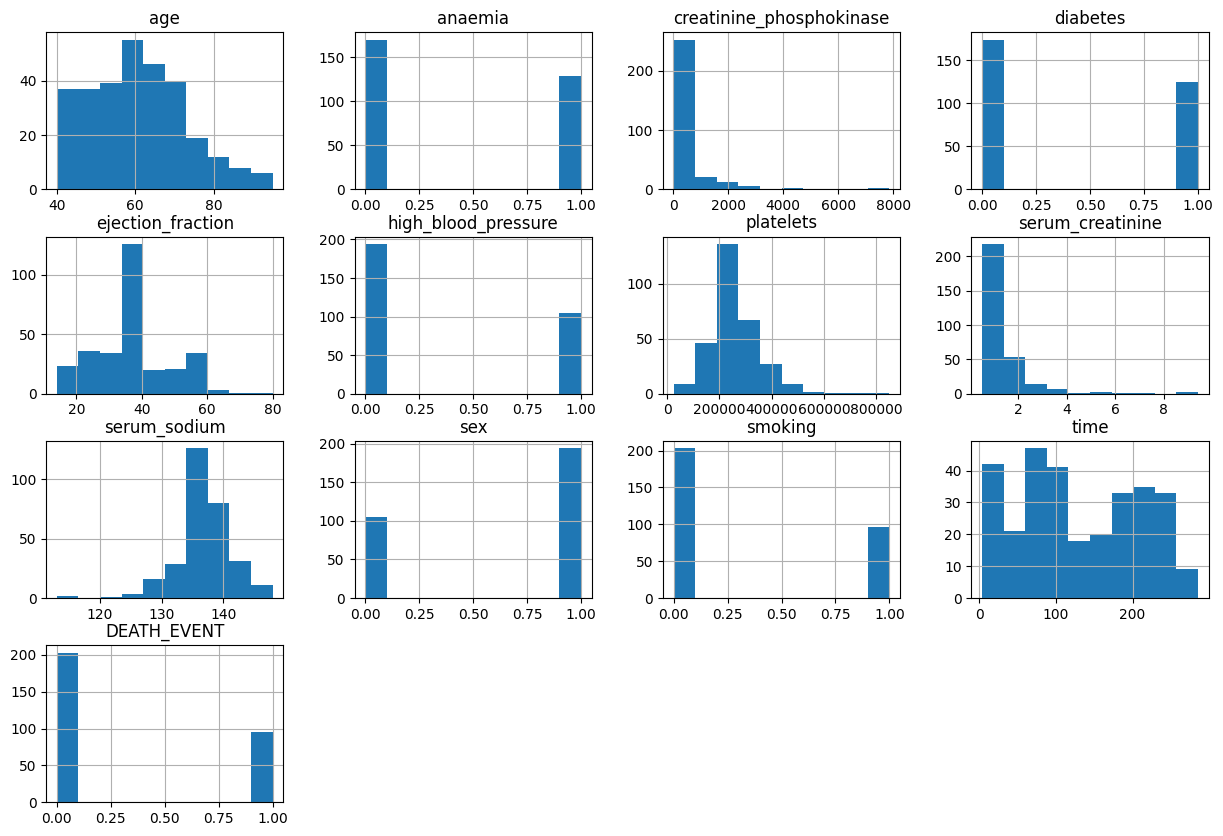

In [45]:
df.hist(figsize=(15,10))

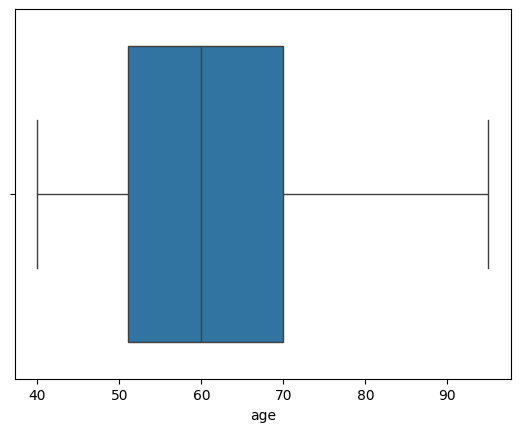

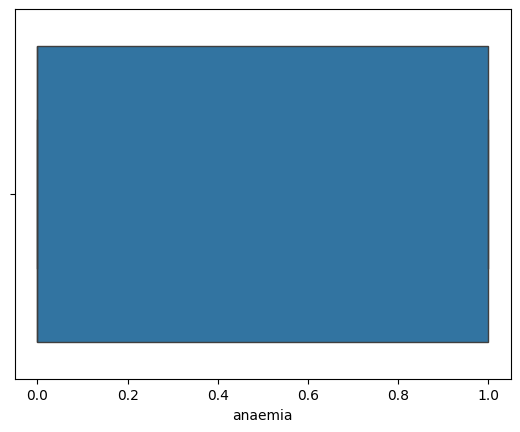

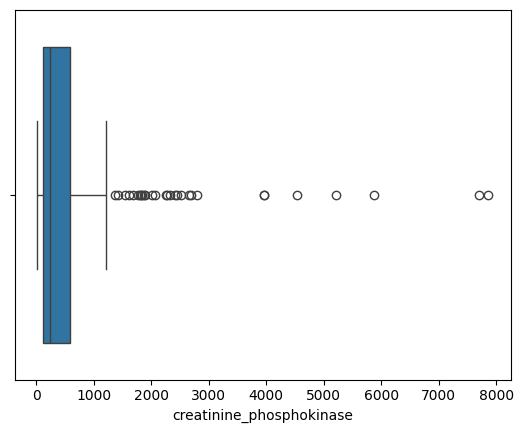

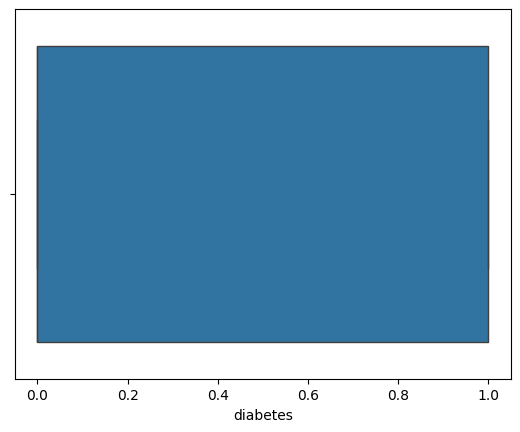

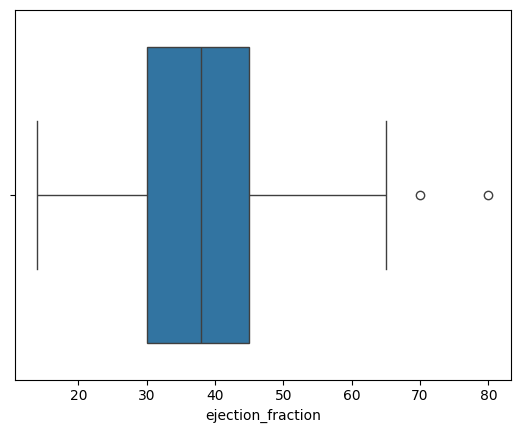

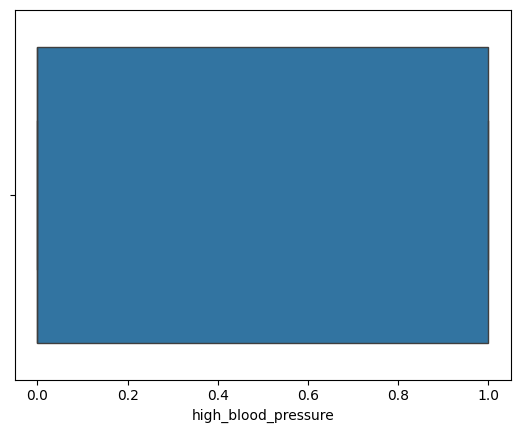

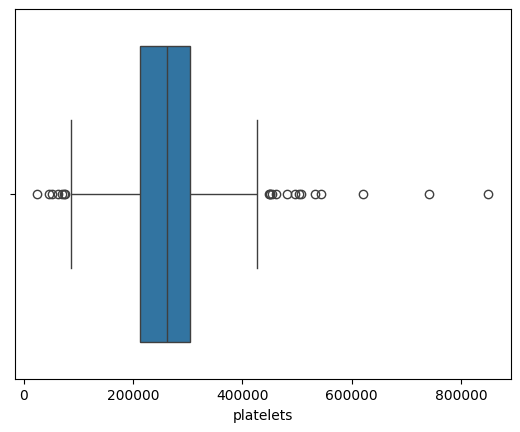

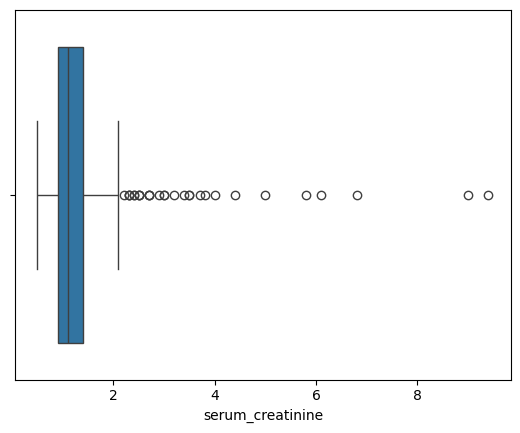

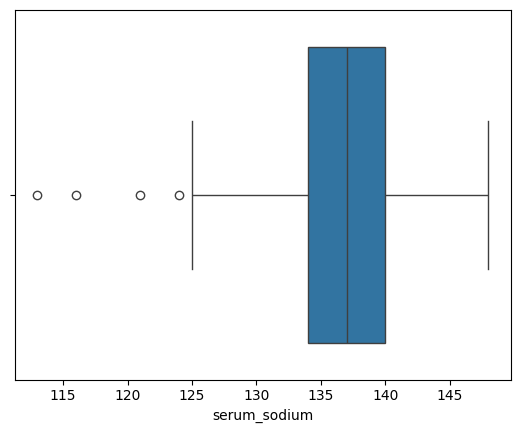

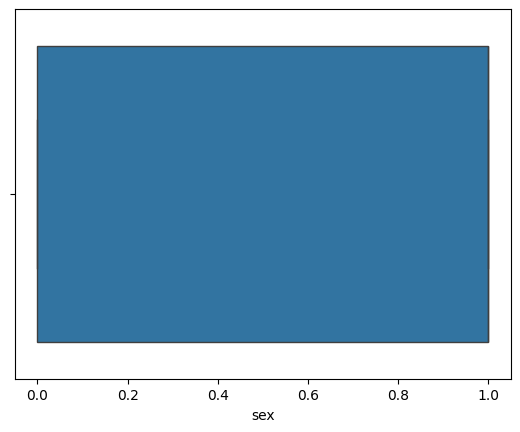

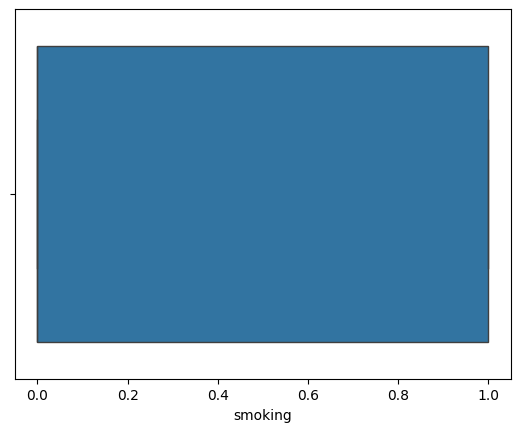

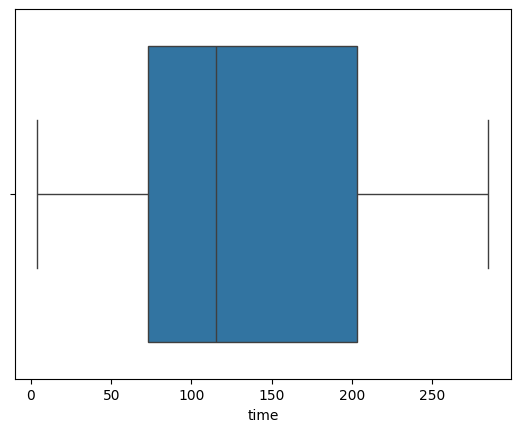

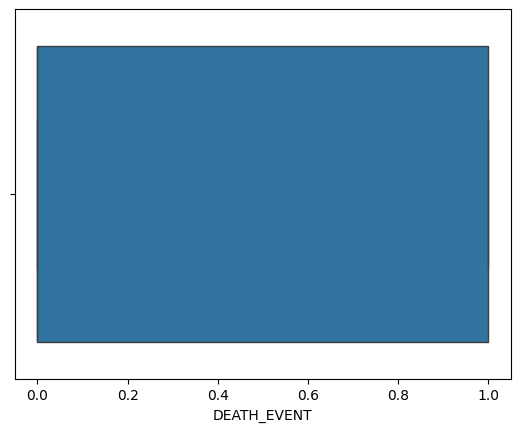

In [46]:
for col in df:
    sns.boxplot(x=df[col])
    plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

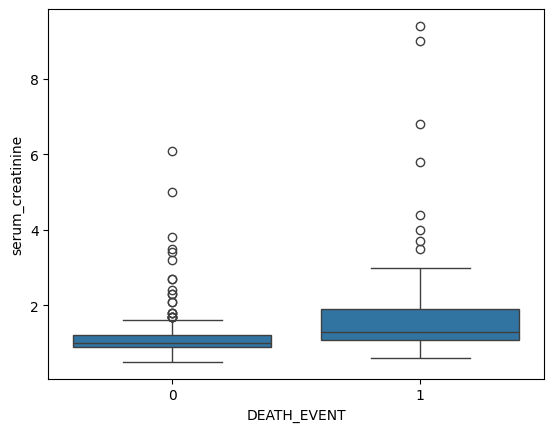

In [47]:
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)


<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

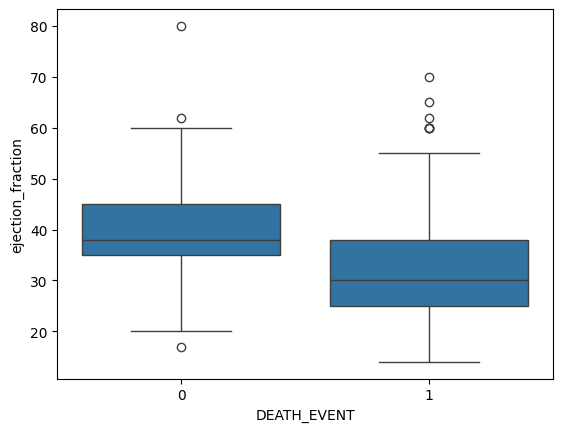

In [48]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

**Conclusion**:
These are clinically meaningful outliers. I will not remove them.

In [49]:
df['serum_creatinine'] = winsorize(df['serum_creatinine'], limits=[0, 0.02])
df['creatinine_phosphokinase'] = winsorize(df['creatinine_phosphokinase'], limits=[0, 0.02])

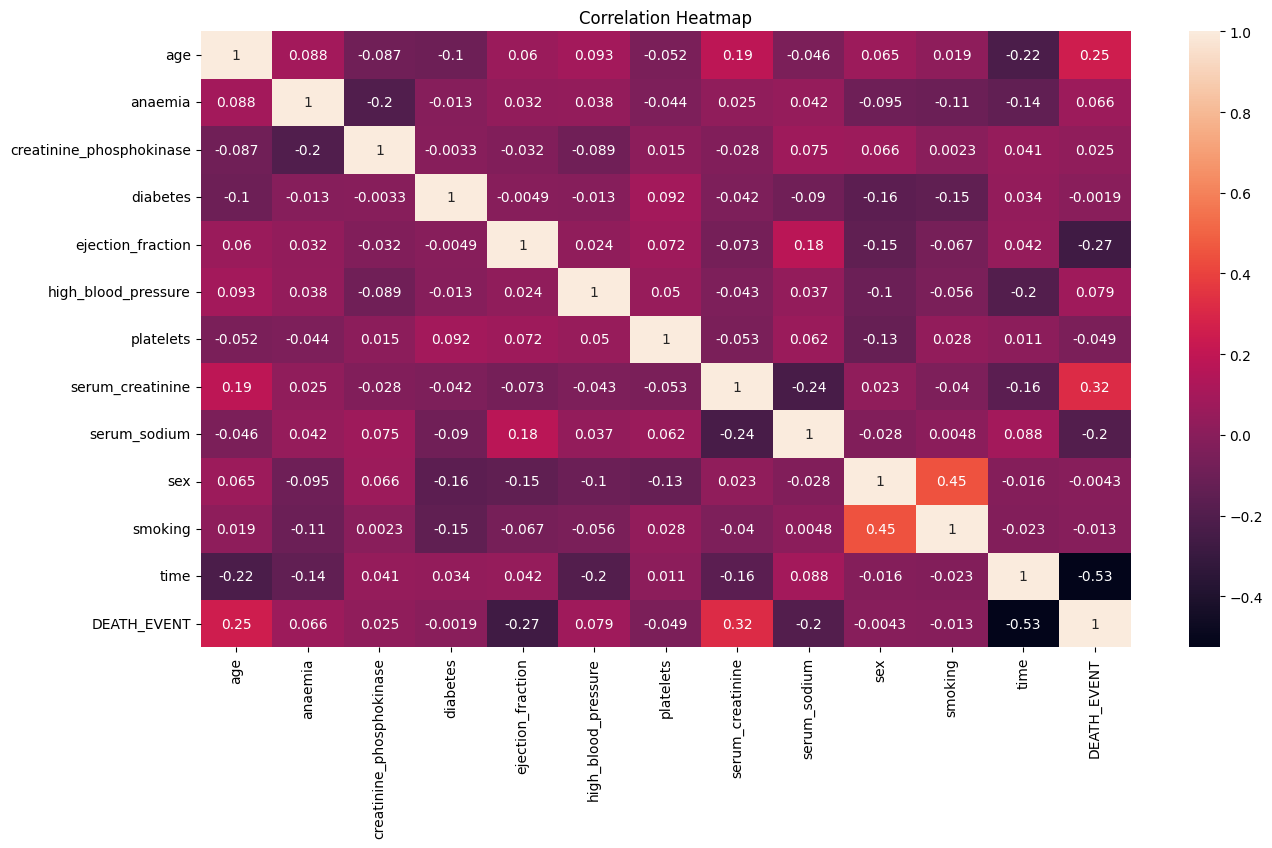

In [50]:
corr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

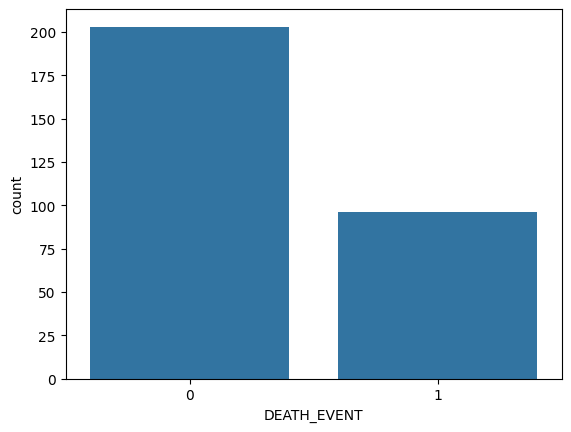

In [51]:
sns.countplot(x=df['DEATH_EVENT'])

There is class imbalance. Can't use SMOTE because it will create non real patients, so will deal with it later

In [52]:
x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']


In [53]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x, y)
pd.Series(mi, index=x.columns).sort_values(ascending=False)

,0
time,0.249406
serum_creatinine,0.063904
age,0.045201
ejection_fraction,0.039480
diabetes,0.029509
creatinine_phosphokinase,0.014879
serum_sodium,0.012689
anaemia,0.000000
platelets,0.000000
high_blood_pressure,0.000000


MI is noticably low, but it shows features' individual information not their interaction with each other

In [54]:
from google.colab import files
df.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>